#Predicting Vehicle Insurance Customers

#Background & Objective
###Background

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of 5.000 each year for a health insurance cover of 200.000. So that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for up to 200.000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only 5.000, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of 5.000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

###Objective
Analysis features for gain more information & optimize metric ML to predicting data

#Problem Statement
##Goal 
Predicting customers interested in vehicle insurance

##Research question 
How to predict whether a customer interested in vehicle insurance with machine learning model?

#Assumption and Data
##Assumption 
To predict interested customers, we using various clasification machine learning. First, we doing baseline model then improving the metric with some technique data processing.  

##Data
This study utilized data from [Kaggle](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?datasetId=869050&sortBy=voteCount&select=train.csv). 

#Importing Package

Wa are using library pycaret for classification model machine learning.

In [ ]:
#For this installation, first install pycaret then restart runtime. Next install following packages as it is
!pip install pycaret --user

In [ ]:
!pip install markupsafe==2.0.1

In [ ]:
import jinja2
from pycaret.classification import *

In [3]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Misc
import warnings
warnings.filterwarnings('ignore')

#Analysis - Modeling

##Data Preparation

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Import Dataset
train = pd.read_csv('/content/drive/MyDrive/Final_project/train_Healthinsurance.csv')
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


The table columns have each value itself consist of:

1. **Id**: Unique ID for the customer
2. **Gender**: Gender of the customer
3. **Age**: Age of the customer
4. **Driving_License**:	0 Customer does not have DL, 1 : Customer already has DL
5. **Region_Code**:	Unique code for the region of the customer
6. **Previously_Insured**:	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. **Vehicle_Age**:	Age of the Vehicle
8. **Vehicle_Damage**:	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
9. **Annual_Premium**: The amount customer needs to pay as premium in the year
10. **PolicySalesChannel**: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. **Vintage**:	Number of Days, Customer has been associated with the company
12. **Response**:	1 : Customer is interested, 0 : Customer is not interested

##Data Preprocessing & Analysis

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In data preprocessing, we will convert data tyoe `float64` data to `int64`.

In [7]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
#Check missing value
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
#Check duplicated data
train.duplicated().sum()

0

There is no both missing value and duplicated data, so we can start analysis each feature. We are using bivariate analysis which analize each featured correlated with target variable. Here we will also use the conversion rate for each variable.

In [10]:
#Function for facilitate visualization process
def grouping(item, df=train):
  new_df = df.groupby(by=item)['Response'].agg(['count']).reset_index()
  new_df['Total'] = df.groupby(by=item)['Response'].agg(['sum']).reset_index()['sum']
  new_df['Percentage'] = new_df['Total']*100/new_df['count']
  new_df = new_df.rename(columns={'count':'Count'})
  return new_df

In [11]:
#train_2 for visualization process only
train_2 = train.copy()

###Target Variable

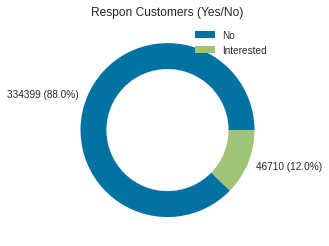

In [14]:
train_response = grouping('Response', df=train_2)
target_value = train_response['Count'].values
target_per = target_value/(sum(target_value))

# Pie Chart
plt.pie(target_per, labels = [f'{j} ({round(i,2)*100}%)' for i,j in zip(list(target_per),list(target_value))])

# draw circle
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()

# Adding Circle in Pie chart
p.gca().add_artist(circle)

plt.title('Respon Customers (Yes/No)')
plt.legend(labels=['No','Interested'])

plt.show()

From the chart, one can observe that among all customers, only 12% customers who were interested for vehicle insurance. Since the imbalance is found to be very high, AUC score is more preferred for evaluating the machine learning model rather than the accuracy.

###Age & Response

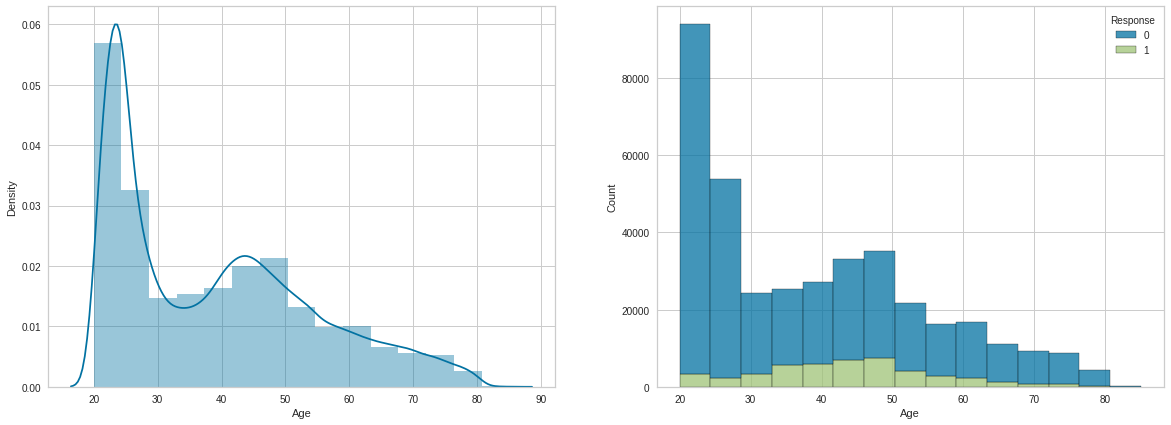

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.distplot(train.Age, bins=15, ax=ax[0])
sns.histplot(data=train, x='Age', hue='Response', bins=15, ax=ax[1], multiple='stack')
plt.savefig('ageresponse.png', dpi=300, pad_inches=0.5)

Age distribution data has highly skewed towards under 30 ages. It is hard to understand why it is, but may it can be a trend characteristic where new generation approaches finance & health in modern way whereas older generations are still reluctant. To gain more insight, we are grouping them into grouping age. 

In [16]:
def grouping_age(x):
  if x >= 20 and x<=35:
    return '20-35'        
  elif x>36 and x<=55:
    return '36-55'
  elif x>56:
    return '>56'

train_2['Group_age']=train_2['Age'].apply(lambda x:grouping_age(x))

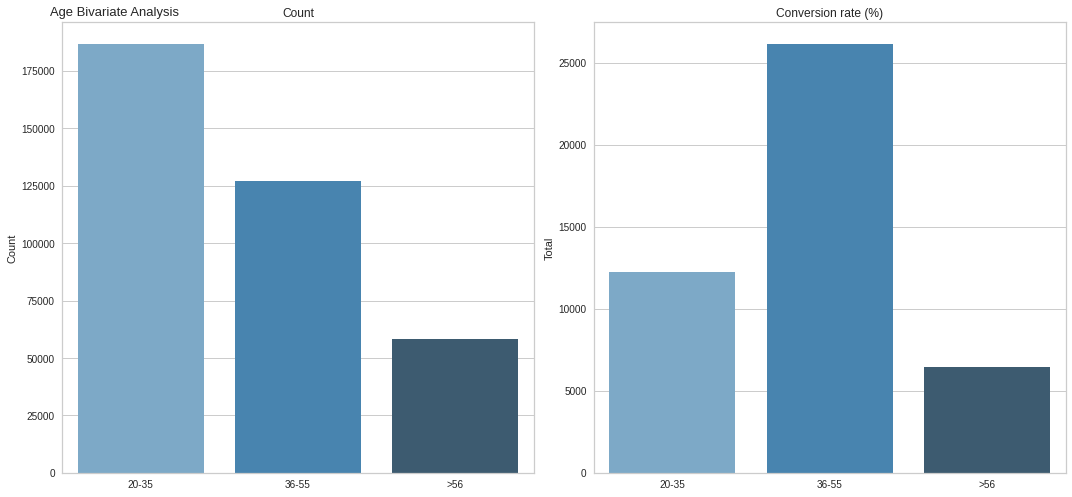

In [17]:
train_age = grouping('Group_age', df=train_2)

#Plot
fig,ax=plt.subplots(1,2,figsize=(15,7))

sns.barplot(data=train_age, x='Group_age', y='Count', palette="Blues_d", ax=ax[0]).set(title='Count',xlabel='')
sns.barplot(data=train_age, x='Group_age', y='Total', palette="Blues_d", ax=ax[1]).set(title='Conversion rate (%)',xlabel='')
plt.suptitle('Age Bivariate Analysis', x=0.05, ha='left', fontsize=13)

fig.tight_layout()

From the table, grouping `36 - 55` are the most interested age ranging in vehicle insurance, instead the biggest population are grouping age `20 -35`. It may happen by reason of better financial conditions to buy more comfortable living facilities.

###Gender & Response

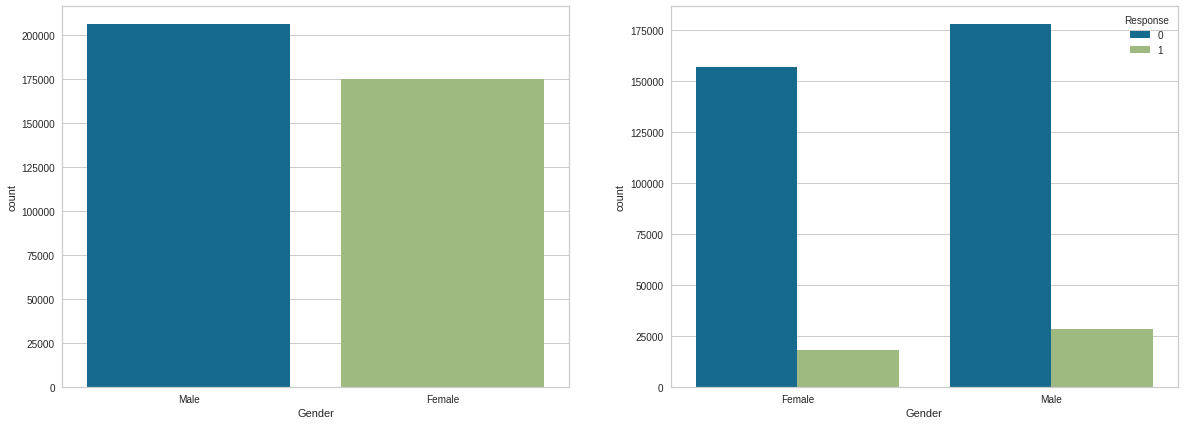

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.countplot(train_2.Gender, ax=ax[0])

df = train_2.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.barplot(data = df, hue = 'Response', y= 'count', x='Gender', ax=ax[1])

###Region Code & Response

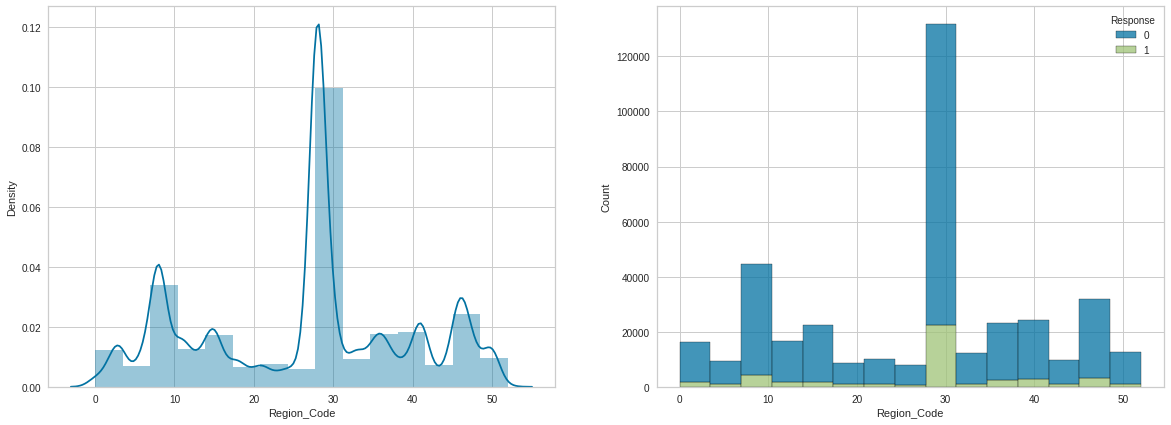

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.distplot(train.Region_Code, ax=ax[0], bins=15)
sns.histplot(data=train, x='Region_Code', hue='Response', ax=ax[1], multiple='stack', bins=15)

There are several `Region_Code` which dominating customers population. We can't grouping them cause each code represent any city/area. 

###Driving License & Response

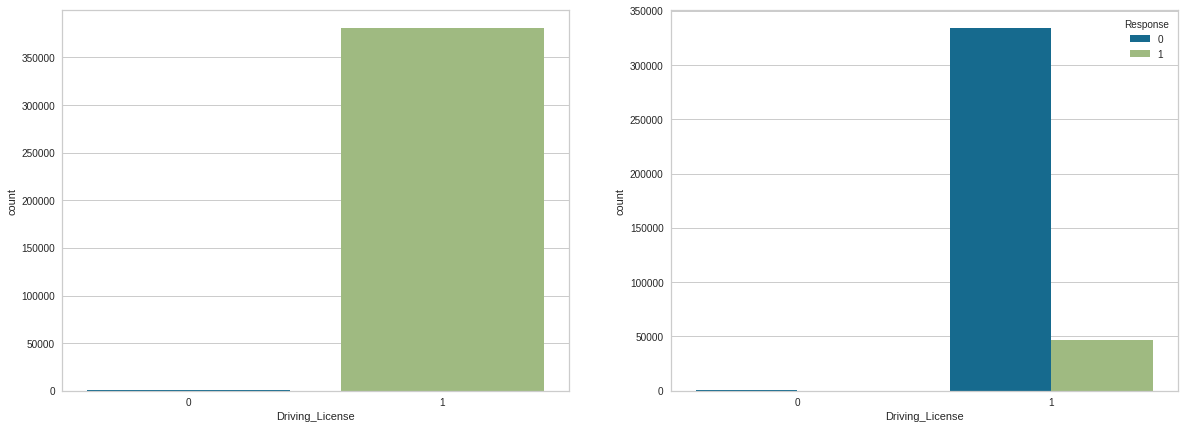

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.countplot(train_2.Driving_License, ax=ax[0])

df = train_2.groupby(['Driving_License','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.barplot(data = df, hue = 'Response', y= 'count', x='Driving_License', ax=ax[1])

Most customers have a driving license also interested in vehicle insurance.

###Previously Insured & Response

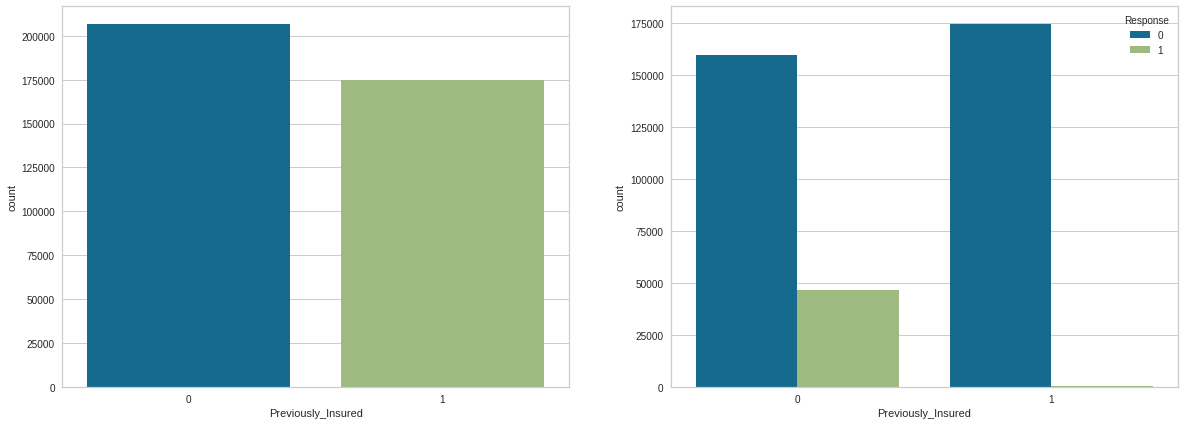

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.countplot(train_2.Previously_Insured, ax=ax[0])

df = train_2.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.barplot(data = df, hue = 'Response', y= 'count', x='Previously_Insured', ax=ax[1])

Only costumers who don't have prevously insured are interesting in our vehicle insurance but not a half that insteresting. It is okay as we know only 11% customers are interested from total customers. We will create modelling to know more precision who customers are actually interesting in vehicle insurance.

###Vehicle Age & Response

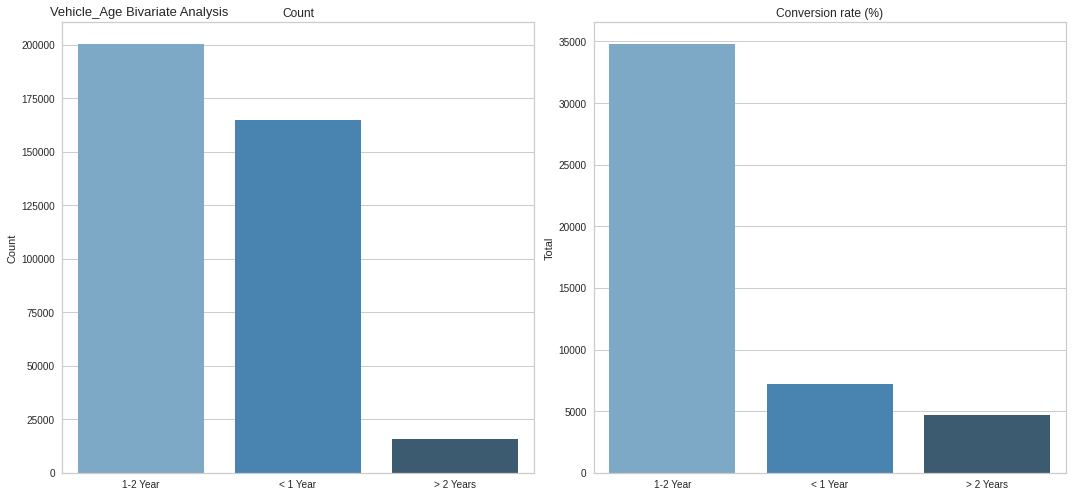

In [22]:
train_vehicle = grouping('Vehicle_Age', df=train_2)

#Plot
fig,ax=plt.subplots(1,2,figsize=(15,7))

a1 = sns.barplot(data=train_vehicle, x='Vehicle_Age', y='Count', palette="Blues_d", ax=ax[0]).set(title='Count',xlabel='')
a2 = sns.barplot(data=train_vehicle, x='Vehicle_Age', y='Total', palette="Blues_d", ax=ax[1]).set(title='Conversion rate (%)',xlabel='')
plt.suptitle('Vehicle_Age Bivariate Analysis', x=0.05, ha='left', fontsize=13)

fig.tight_layout()

Grouping 1 - 2 year in vehicle age are the most interested customers group. 

###Vehicle Damage & Response

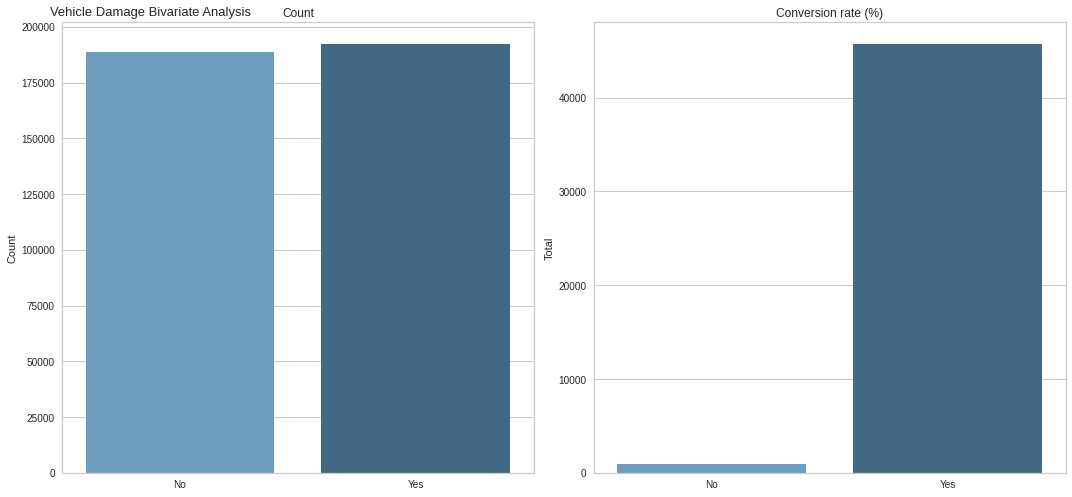

In [23]:
train_vehicle_damage = grouping('Vehicle_Damage', df=train_2)

#Plot
fig,ax=plt.subplots(1,2,figsize=(15,7))

a1 = sns.barplot(data=train_vehicle_damage, x='Vehicle_Damage', y='Count', palette="Blues_d", ax=ax[0]).set(title='Count',xlabel='')
a2 = sns.barplot(data=train_vehicle_damage, x='Vehicle_Damage', y='Total', palette="Blues_d", ax=ax[1]).set(title='Conversion rate (%)',xlabel='')
plt.suptitle('Vehicle Damage Bivariate Analysis', x=0.05, ha='left', fontsize=13)

fig.tight_layout()

It is a good insight that majority of customers who had experienced vehicle damage are very interested in vehicle insurance, so company can offering them vehicle insurance.

###Annual Premium & Response

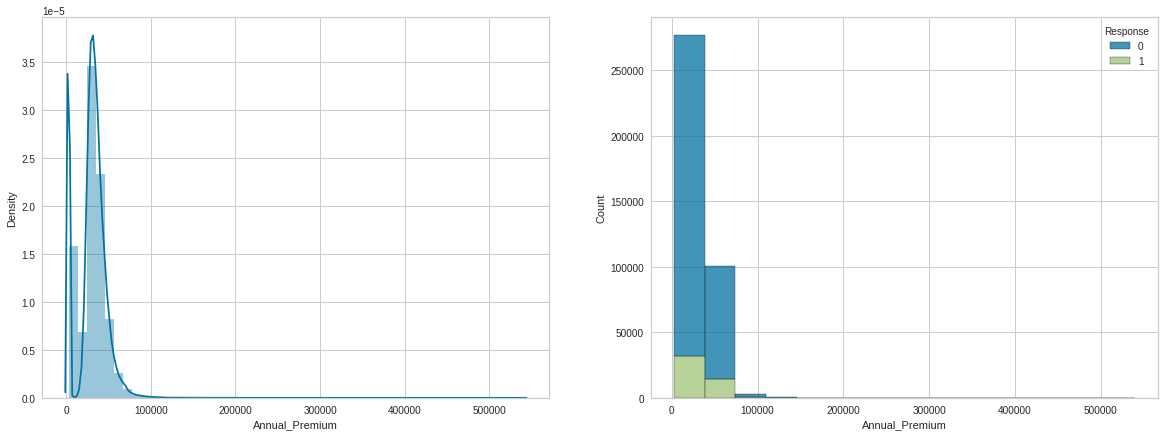

In [24]:
#Annual Premium
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.distplot(train.Annual_Premium, ax=ax[0])
sns.histplot(data=train, x='Annual_Premium', hue='Response',bins=15, multiple='stack', ax=ax[1])

Annual premium have a wide range data value. We will selecting some ranging data to see who customers most likely interest in vehicle insurance by annual premium subscription.

In [25]:
train_annual_premium = train_2[train_2['Annual_Premium']<80000].sort_values('Annual_Premium', ascending=False)

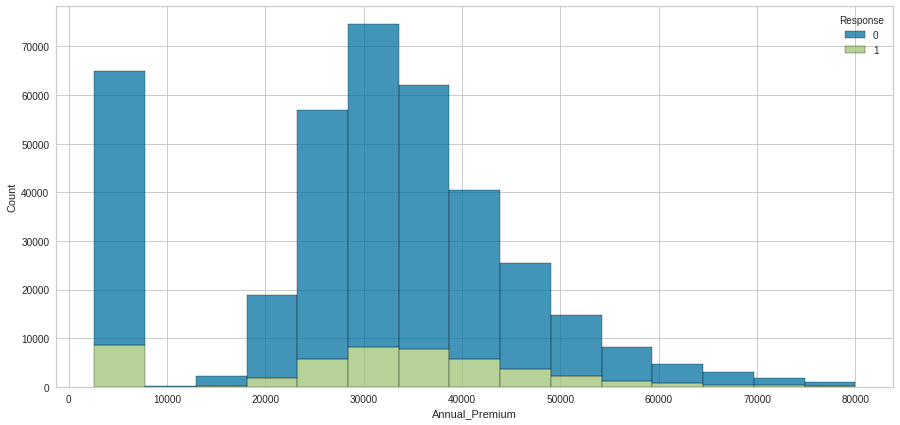

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=train_annual_premium , x='Annual_Premium', hue='Response',bins=15, multiple='stack')

Surprisingly, most costumers interested in vehicle insurance are they had paid annual_premium less than 80.000 instead of they are paying higher. 

In [27]:
#function to cluster annual premiium for visualization
def cluster_premi(x):
  if x <= 20000:
    return '0 - 20.000'        
  elif x > 20000 and x <= 40000:
    return '20.000 - 40.000'
  elif x > 40000 and x <= 60000:
    return '40.000 - 60.000'
  elif x > 6000:
    return 'More than 60.000'

train_annual_premium ['Group_premi']=train_annual_premium ['Annual_Premium'].apply(lambda x:cluster_premi(x))

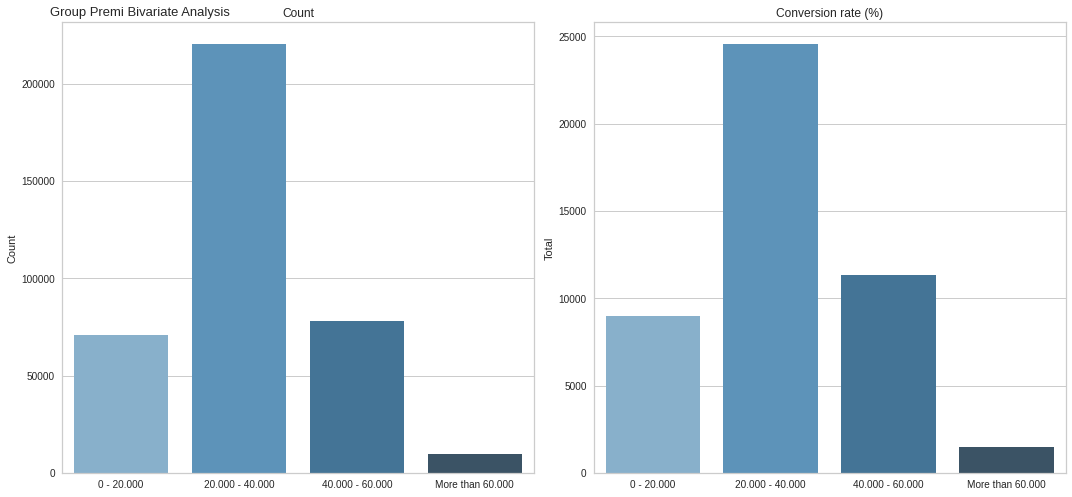

In [28]:
train_premi = grouping('Group_premi', df=train_annual_premium)

#Plot
fig,ax=plt.subplots(1,2,figsize=(15,7))

a1 = sns.barplot(data=train_premi, x='Group_premi', y='Count', palette="Blues_d", ax=ax[0]).set(title='Count',xlabel='')
a2 = sns.barplot(data=train_premi, x='Group_premi', y='Total', palette="Blues_d", ax=ax[1]).set(title='Conversion rate (%)',xlabel='')
plt.suptitle('Group Premi Bivariate Analysis', x=0.05, ha='left', fontsize=13)

fig.tight_layout()

Customers paying annual premium in range 20.000 - 40.000 are the biggest group which interesting in vehicle insurance. It is a good insight but we need more information about what type of insurance and offer in up to 40.000 annual premium. 

###Policy Sales Channel & Response

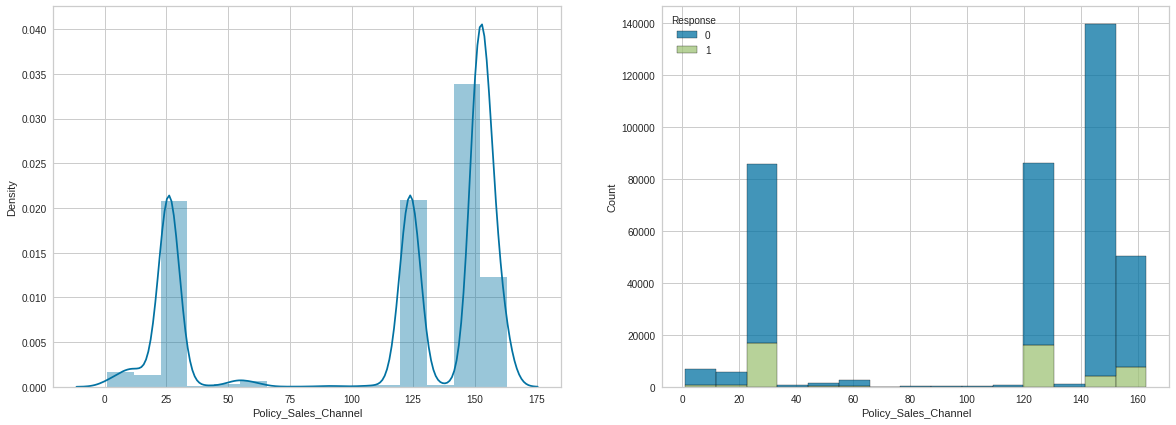

In [29]:
#Policy Sales Channel
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.distplot(train.Policy_Sales_Channel, bins=15, ax=ax[0])
sns.histplot(data=train, x='Policy_Sales_Channel', hue='Response',bins=15, multiple='stack', ax=ax[1])

Policy sales channel represent omni channel that converting audience to buyers. We need more information about it in order to analize some sales channel more likely converted than others.

###Vintage Channel & Response

In [30]:
#function to cluster annual premiium for visualization
def cluster_vintage(x):
  if x <= 60:
    return '0 - 3 Month'        
  elif x > 60 and x <= 180:
    return '3 - 6 Month'
  elif x > 180 and x <= 270:
    return '6 Month - 9 Month'
  elif x > 270:
    return 'More than 9 Month'

train_2['Group_Month']=train_2['Vintage'].apply(lambda x:cluster_vintage(x))

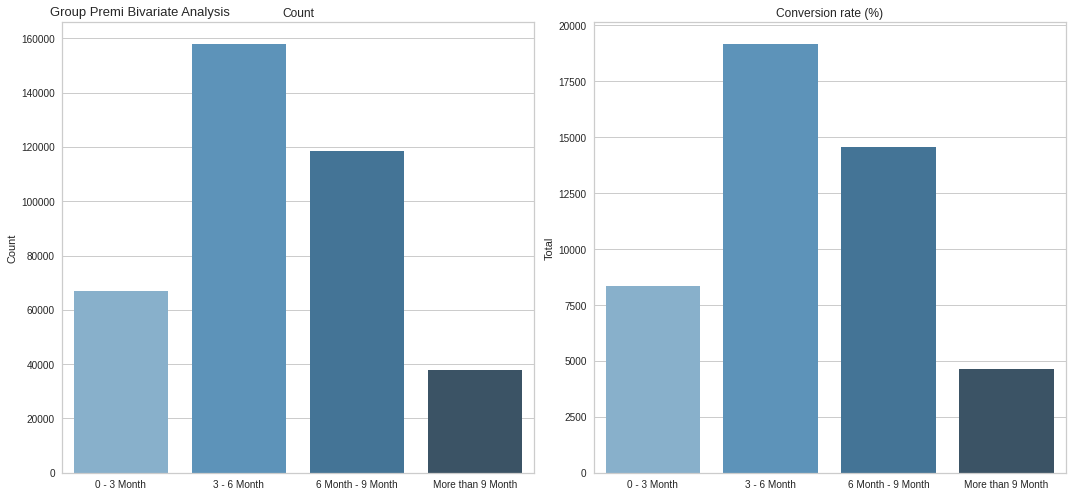

In [31]:
train_month = grouping('Group_Month', df=train_2)

#Plot
fig,ax=plt.subplots(1,2,figsize=(15,7))

a1 = sns.barplot(data=train_month, x='Group_Month', y='Count', palette="Blues_d", ax=ax[0]).set(title='Count',xlabel='')
a2 = sns.barplot(data=train_month, x='Group_Month', y='Total', palette="Blues_d", ax=ax[1]).set(title='Conversion rate (%)',xlabel='')
plt.suptitle('Group Premi Bivariate Analysis', x=0.05, ha='left', fontsize=13)

fig.tight_layout()

Most interested customers are in 3 - 6 month group and then the second interested group is 6 - 9 month. So, it can be an insight to offering existing customers a vehicle insurance when they are in 3 - 9 months as our loyal customers. 

##Data Preprocessing

In [32]:
#Drop id columns
train = train.drop(columns='id')

In [33]:
#convert dtype columns to integer
train['Annual_Premium'] = train['Annual_Premium'].astype(int)
train['Region_Code'] = train['Region_Code'].astype(int)
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype(int)

In [34]:
#Divided the data into categorical & numerical value to check distribution &  outliars
cat = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
num = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

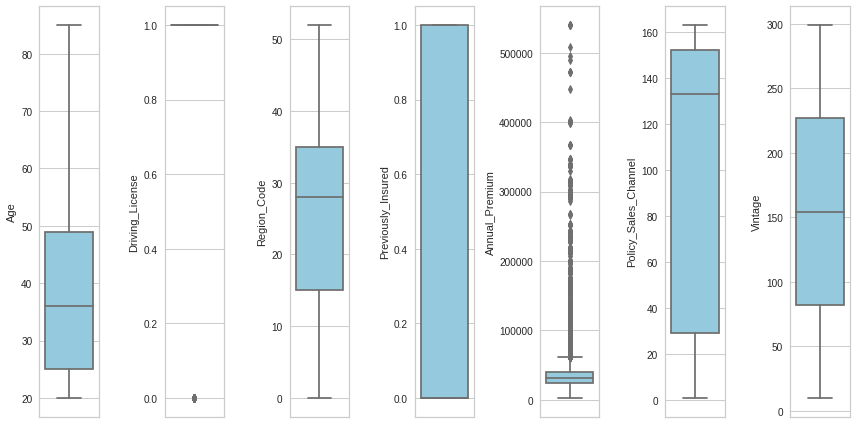

In [35]:
#Check data outliers
plt.figure(figsize=(12,6))

features = num
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=train[features[i]], color='skyblue')
  plt.tight_layout()

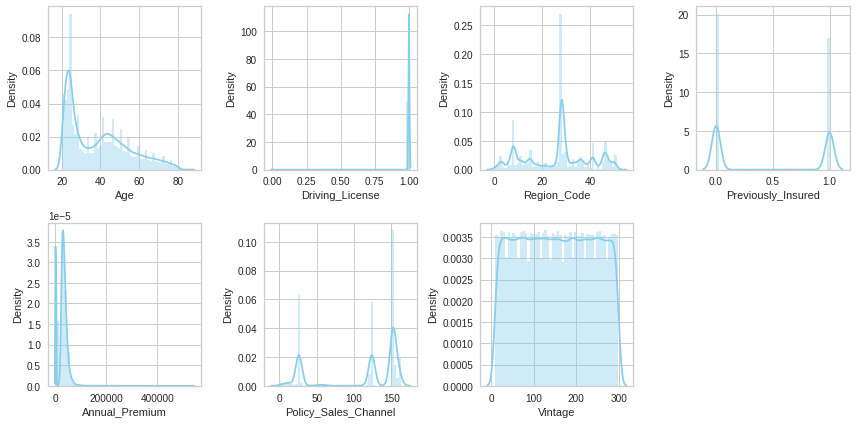

In [36]:
#Check distribution data

plt.figure(figsize=(12,6))

features = num
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=train[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

##Baseline Model (Only Numerical Value)

We create baseline model to have a groundwork before doing some improvement. If future improvement we're doing diminish our model score than baseline, then we know our improvement not fit for model.This baseline model use one-time train test split (no cross validations).  

In [37]:
numerical = train[['Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel' ,'Vintage', 'Response']]
numerical

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,1,28,0,40454,26,217,1
1,76,1,3,0,33536,26,183,0
2,47,1,28,0,38294,26,27,1
3,21,1,11,1,28619,152,203,0
4,29,1,41,1,27496,152,39,0
...,...,...,...,...,...,...,...,...
381104,74,1,26,1,30170,26,88,0
381105,30,1,37,1,40016,152,131,0
381106,21,1,30,1,35118,160,161,0
381107,68,1,14,0,44617,124,74,0


In [38]:
s = setup(numerical, target = 'Response',session_id=123)

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(381109, 8)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
#baseline model 
base_model=compare_models(sort='AUC', cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8780,0.8427,0.0002,0.2143,0.0004,0.0002,0.0031,2.12
gbc,Gradient Boosting Classifier,0.8780,0.8413,0.0000,0.0000,0.0000,0.0000,0.0000,33.16
ada,Ada Boost Classifier,0.8780,0.8389,0.0000,0.0000,0.0000,0.0000,0.0000,9.28
rf,Random Forest Classifier,0.8644,0.8142,0.0997,0.3205,0.1521,0.1000,0.1205,30.75
qda,Quadratic Discriminant Analysis,0.5873,0.8125,0.9902,0.2269,0.3692,0.2130,0.3420,0.12
et,Extra Trees Classifier,0.8588,0.8066,0.1285,0.3097,0.1817,0.1186,0.1325,19.93
nb,Naive Bayes,0.8752,0.7950,0.0209,0.3198,0.0393,0.0247,0.0542,0.06
lda,Linear Discriminant Analysis,0.8780,0.7926,0.0001,0.5000,0.0001,0.0001,0.0048,0.32
knn,K Neighbors Classifier,0.8596,0.6002,0.0563,0.2135,0.0891,0.0403,0.0510,4.40
lr,Logistic Regression,0.8780,0.5945,0.0000,0.0000,0.0000,0.0000,0.0000,2.47


Based on iteration above, we get `Light Gradient Boosting Machine` as the fittest model for this dataset based on AUC Score about 0.8427 (84%) and having lower training test time. 

##Model Improvement

### Baseline Model with All Features
So, we will encoding categorical data to numerical data 

In [40]:
train['Gender'] = train['Gender'].map({'Female': 0, 'Male':1}).astype(int)

In [41]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes':1, 'No':0}).astype(int)

In [42]:
train.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [43]:
onehot_columns = ['Vehicle_Age']
train = pd.get_dummies(train, columns = onehot_columns)

In [44]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28,0,1,40454,26,217,1,0,0,1
1,1,76,1,3,0,0,33536,26,183,0,1,0,0
2,1,47,1,28,0,1,38294,26,27,1,0,0,1
3,1,21,1,11,1,0,28619,152,203,0,0,1,0
4,0,29,1,41,1,0,27496,152,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26,1,0,30170,26,88,0,1,0,0
381105,1,30,1,37,1,0,40016,152,131,0,0,1,0
381106,1,21,1,30,1,0,35118,160,161,0,0,1,0
381107,0,68,1,14,0,1,44617,124,74,0,0,0,1


In [45]:
s_2 = setup(train, target = 'Response',session_id=123)

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(381109, 13)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [46]:
#Model improvement with all features
model_improvement=compare_models(sort='AUC', cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8779,0.8574,0.0029,0.4227,0.0058,0.0042,0.0268,2.38
gbc,Gradient Boosting Classifier,0.8780,0.8565,0.0000,0.0000,0.0000,0.0000,0.0000,40.04
ada,Ada Boost Classifier,0.8780,0.8523,0.0003,0.3636,0.0006,0.0004,0.0072,9.82
qda,Quadratic Discriminant Analysis,0.7219,0.8352,0.8419,0.2840,0.4248,0.2964,0.3727,0.70
rf,Random Forest Classifier,0.8669,0.8333,0.1234,0.3647,0.1844,0.1308,0.1539,33.53
lda,Linear Discriminant Analysis,0.8777,0.8330,0.0032,0.3333,0.0063,0.0040,0.0220,0.53
et,Extra Trees Classifier,0.8614,0.8253,0.1431,0.3388,0.2013,0.1389,0.1544,21.55
lr,Logistic Regression,0.8689,0.8190,0.0630,0.3138,0.1050,0.0669,0.0929,10.14
nb,Naive Bayes,0.8139,0.8123,0.3782,0.2949,0.3314,0.2252,0.2276,0.08
dt,Decision Tree Classifier,0.8234,0.6040,0.3139,0.2917,0.3024,0.2014,0.2016,1.79


Within all features, the model get improvement in AUC up to 0.8574 (85%) from 0.8427 (84%) in baseline model with numerical features. This is good improving.

###Cross Validation

In [50]:
#Model improvement with cross validation
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8769,0.8555,0.0024,0.3333,0.0048,0.0031,0.0192
1,0.8768,0.8570,0.0027,0.3333,0.0054,0.0034,0.0204
2,0.8770,0.8604,0.0024,0.4000,0.0049,0.0034,0.0231
3,0.8769,0.8548,0.0043,0.4118,0.0085,0.0059,0.0314
4,0.8770,0.8567,0.0031,0.4000,0.0061,0.0042,0.0259
5,0.8764,0.8558,0.0031,0.2439,0.0060,0.0030,0.0145
6,0.8768,0.8556,0.0024,0.3077,0.0048,0.0029,0.0176
7,0.8769,0.8589,0.0012,0.2500,0.0024,0.0012,0.0095
8,0.8773,0.8588,0.0052,0.5484,0.0103,0.0080,0.0442


In [51]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


This above is default setting for cross validation in pycaret. If the models have underfitting/overfitting, it can be optimized by each features above. The default method of cross validation is RandomSearchCV and also it can changes to others method.  

Our model get improvement up to 0.8607 from baseline model with all features as 0.8574 in class 2 cross validation

###Tuning Parameter

In [52]:
#Model improvement with tuning parameter
tuned_lightgbm = tune_model(lightgbm, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8763,0.8550,0.0180,0.4214,0.0345,0.0247,0.0661
1,0.8774,0.8569,0.0232,0.5241,0.0444,0.0344,0.0904
2,0.8775,0.8611,0.0211,0.5391,0.0405,0.0316,0.0880
3,0.8766,0.8542,0.0241,0.4540,0.0458,0.0338,0.0818
4,0.8769,0.8568,0.0201,0.4748,0.0386,0.0289,0.0776
5,0.8775,0.8570,0.0214,0.5385,0.0411,0.0320,0.0886
6,0.8772,0.8557,0.0177,0.4957,0.0342,0.0259,0.0754
7,0.8766,0.8575,0.0174,0.4419,0.0335,0.0244,0.0678
8,0.8777,0.8588,0.0177,0.5686,0.0343,0.0271,0.0842


After tuning parameter, AUC score have a quiet up in 0.8611 in class 2 from cross validation in 0.8607.

In [53]:
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


###ROC AUC Plot

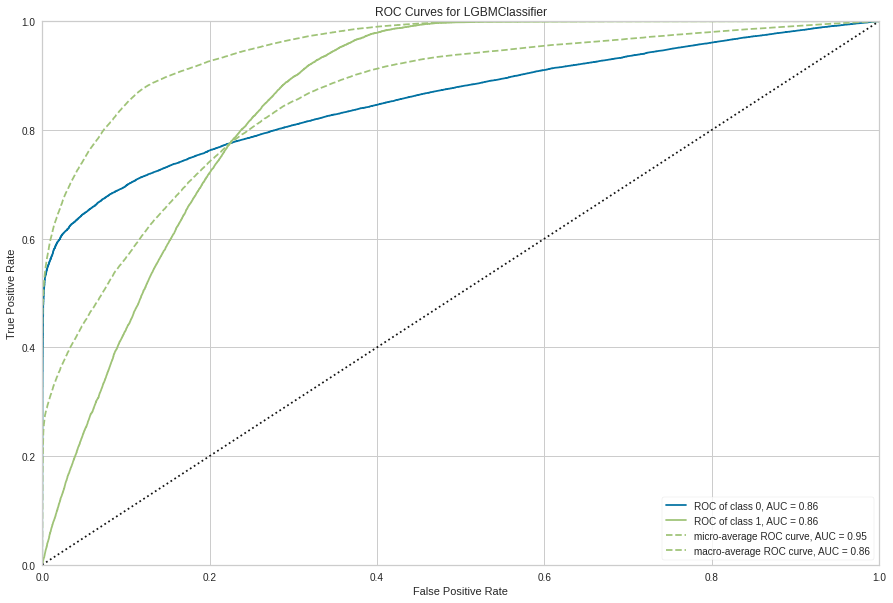

<Figure size 432x288 with 0 Axes>

In [54]:
#AUC plot
fig, ax = plt.subplots(figsize=(15,10))

plot_model(tuned_lightgbm, plot = 'auc')
plt.savefig('roc.png', dpi=300, pad_inches=0.8)

###Confusion Matrix

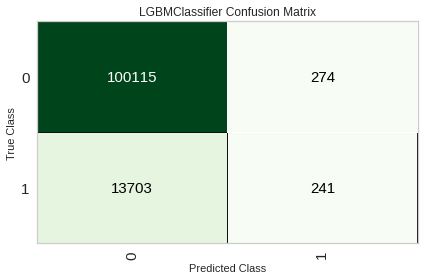

In [57]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

###Model Evaluation

In [56]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8778,0.8574,0.0173,0.468,0.0333,0.0249,0.0711


,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender_1,Driving_License_1,Previously_Insured_0,Vehicle_Damage_1,Response,Label,Score
0,22.0,46.0,2630.0,160.0,267.0,0,1,0,0.0,1.0,1.0,1.0,0,0,0.9550
1,27.0,41.0,2630.0,160.0,275.0,0,1,0,1.0,1.0,0.0,1.0,0,0,0.9945
2,46.0,28.0,32816.0,124.0,138.0,1,0,0,1.0,1.0,0.0,0.0,0,0,0.9989
3,25.0,29.0,41936.0,152.0,34.0,0,1,0,1.0,1.0,0.0,0.0,0,0,0.9994
4,21.0,30.0,33446.0,152.0,295.0,0,1,0,0.0,1.0,1.0,1.0,0,0,0.9224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,42.0,28.0,28609.0,124.0,64.0,1,0,0,1.0,1.0,1.0,0.0,0,0,0.9411
114329,62.0,28.0,65932.0,13.0,210.0,1,0,0,1.0,1.0,0.0,0.0,0,0,0.9996
114330,48.0,6.0,22611.0,26.0,288.0,1,0,0,1.0,1.0,1.0,1.0,0,0,0.5705
114331,67.0,50.0,34190.0,8.0,152.0,1,0,0,0.0,1.0,0.0,0.0,0,0,0.9997


The AUC on the test/hold-out set is 0.8573 compared to 0.8611 achieved on tuning hyperparameter. This is not a significant difference. If there is a large variation between the test/hold-out and cross validation results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. 

###Featured Importance

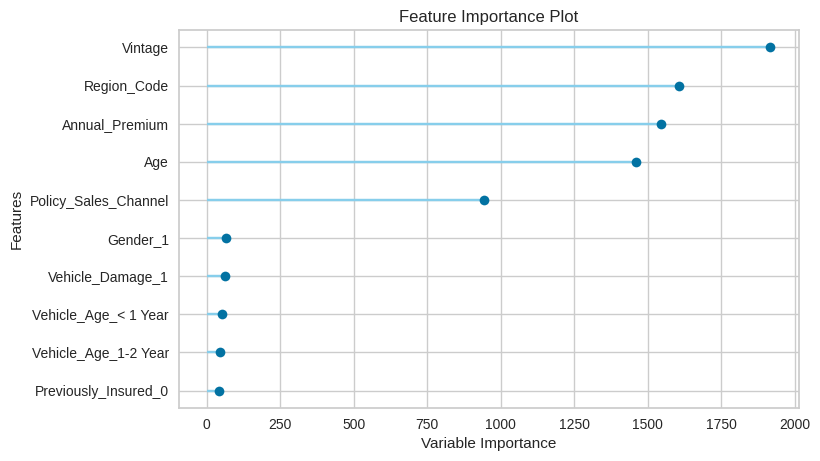

<Figure size 432x288 with 0 Axes>

In [59]:
plot_model(tuned_lightgbm, plot='feature')
plt.savefig('featuredimportance.png', dpi=300, pad_inches=0.8)

Top 4 in features importance are `Vintage`, `Region_Code`, `Annual_Premium`, and `Age`. Company have to focus on this features. Only `Region_Code` features which need more information about representation area of itself, so we can mapping where company customers most likely interesting to vehicle insurance.

#Conclusion
* The most important features based on our model are `Vintage`, `Region_Code`, `Annual_Premium` & `Age`. Focus on them. We need more information about these features to have more insight such as city/country of region code, and type of insurance (hirarcial) to match with `Annual_Premium`.
* Most customers are under 30th, then you need some strategy to nurture them as long as you can. In fact that, the biggest group age that have interest in vehicel insurance are from group age 36-55.
* Since customers that have `vehicle_damage` are more interesting in vehicle damage, then you can offering them.

#Recomendation
*   If possible, you can provide vehicle type and financial condition measuring such as job position in a company, or anything else. It can be improving machine learning prediction. 
*   Start this cross-selling and evaluating. If you have a good results, then you can doing the same with your others product.